# Comprehensive Assessment : Deep Learning

![Diabetes](Diabetes.jpg)


 

## Objective:
This project aims to build an Artificial Neural Network (ANN) model to predict the progression of diabetes using the Diabetes dataset from sklearn. The insights gained from this model will help healthcare professionals better understand the factors influencing diabetes progression, ultimately aiding in treatment planning and preventive care.

In [79]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## 1.Loading and Preprocessing 

In [80]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [81]:
# Loading the given  dataset
df = datasets.load_diabetes()
X, y = df.data, df.target
df = pd.DataFrame(data=X, columns=df.feature_names)
df['target'] = y

In [82]:
# Display first  rows
df.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062917,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066629,0.090620,0.108914,0.022869,0.017703,-0.035816,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014960,0.011349,110.0
9,-0.070900,-0.044642,0.039062,-0.033213,-0.012577,-0.034508,-0.024993,-0.002592,0.067737,-0.013504,310.0


In [83]:
# Display last  rows
df.tail(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
432,0.009016,-0.044642,0.055229,-0.005670,0.057597,0.044719,-0.002903,0.023239,0.055686,0.106617,173.0
433,-0.027310,-0.044642,-0.060097,-0.029770,0.046589,0.019980,0.122273,-0.039493,-0.051404,-0.009362,72.0
434,0.016281,-0.044642,0.001339,0.008101,0.005311,0.010899,0.030232,-0.039493,-0.045424,0.032059,49.0
435,-0.012780,-0.044642,-0.023451,-0.040099,-0.016704,0.004636,-0.017629,-0.002592,-0.038460,-0.038357,64.0
436,-0.056370,-0.044642,-0.074108,-0.050427,-0.024960,-0.047034,0.092820,-0.076395,-0.061176,-0.046641,48.0
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0
441,-0.045472,-0.044642,-0.073030,-0.081413,0.083740,0.027809,0.173816,-0.039493,-0.004222,0.003064,57.0


In [84]:
#Importing StandardScaler ansd train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into training and testing sets
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=42)


### Data Discription
This dataset shows the diabetes study.This containing 442 samples with 10 normalized features and a target variable. The features include patient metrics like age, sex, Body Mass Index (BMI), blood pressure, and six blood serum measurements (s1-s6). The target variable represents a quantitative measure of diabetes progression one year after baseline. This data is typically used to model and predict how different factors influence the progression of diabetes, aiding in the understanding and management of the disease.

## EDA 

In [85]:
# Display the basic informations about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
None


In [86]:
#Finding the null values
df.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [87]:
#shape of the dataset
df.shape

(442, 11)

In [88]:
# Column
df.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object')

In [89]:
# Describing the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,442.0,-2.511817e-19,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.230790e-17,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-2.245564e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,-4.797570e-17,0.047619,-0.112399,-0.036656,-0.005670,0.035644,0.132044
s1,442.0,-1.381499e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,3.918434e-17,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-5.777179e-18,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,-9.042540e-18,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,9.293722e-17,0.047619,-0.126097,-0.033246,-0.001947,0.032432,0.133597
s6,442.0,1.130318e-17,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


In [90]:
# Checking the duplicates 
df.duplicated().sum()

0

In [91]:
# Displaying the Data Types
df.dtypes

age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object

In [92]:
#Showing the size of the dataset
df.size

4862

In [93]:
df.iloc[:,0:8]

,age,sex,bmi,bp,s1,s2,s3,s4
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592
...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560


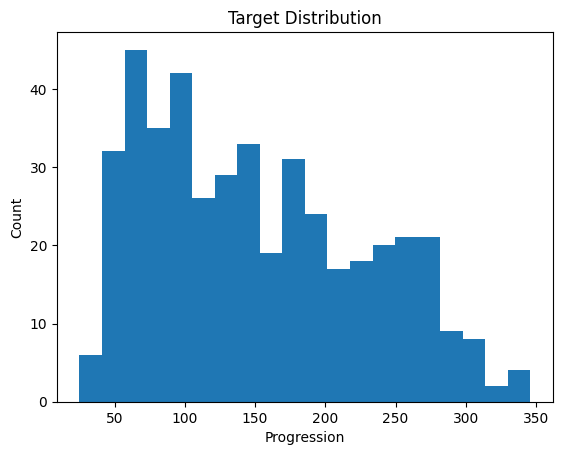

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting
plt.hist(df['target'], bins=20)
plt.xlabel('Progression')
plt.ylabel('Count')
plt.title('Target Distribution')
plt.show()

The histogram you provided shows the distribution of the target variable

Right-Skewed Distribution: The data is concentrated on the left side, indicating that most patients have lower disease progression values. The frequency decreases as the disease progression value increases.

Frequency Peaks: The highest frequency of disease progression values is around the lower end of the scale, suggesting that a significant number of patients have mild disease progression.

Outliers: There are fewer instances of high disease progression, which could be outliers or rare cases.

Trend Line: The overlaying line graph, likely representing a probability distribution, follows the same right-skewed pattern, reinforcing the observation that lower disease progression values are more common.

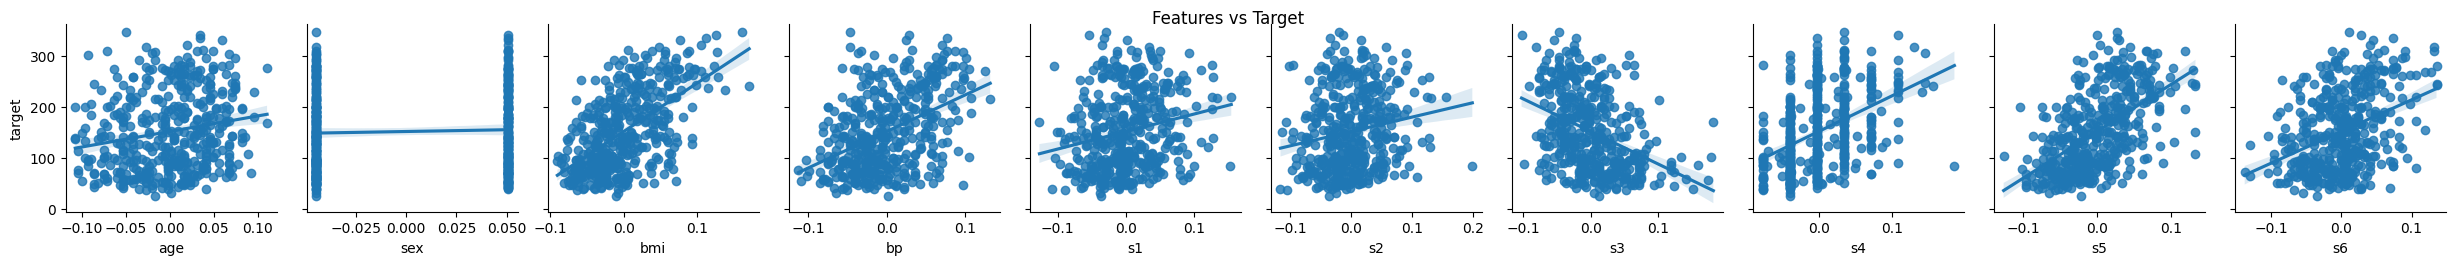

In [95]:
#  Showing the Pairplot 
sns.pairplot(df, y_vars='target', x_vars=df.columns[:-1], kind='reg')
plt.suptitle('Features vs Target', y=1.02)
plt.show()

Age vs Disease Progression:
There appears to be a slight positive correlation between age and disease progression, indicating that older individuals might experience higher disease progression.
 
Sex vs Disease Progression:
The data points are spread out, suggesting no clear correlation between sex and disease progression. This implies that disease progression is relatively independent of sex.
 
BMI vs Disease Progression:
There seems to be a moderate positive correlation between BMI and disease progression. Higher BMI values are associated with higher disease progression, indicating that body mass index could be a significant factor in disease progression.

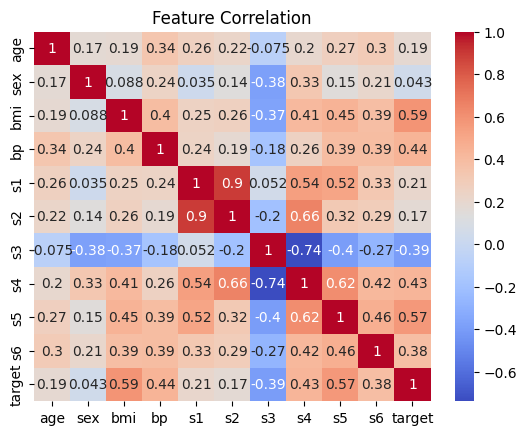

In [96]:
# Displaying the Correlation heatmap
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

## 3. Building the ANN Model 

This the  correlation heatmap of various features.The insights are:
Strong Positive Correlations:
s3 and s4: These features have a strong positive correlation, indicating that as one increases, the other tends to increase as well.
bmi and bp: These features also show a strong positive correlation, suggesting a relationship between body mass index and blood pressure.

Strong Negative Correlations:
bmi and s2: There’s a strong negative correlation here, meaning that as BMI increases, the value of s2 tends to decrease.

In [97]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialize the ANN
mdl = Sequential()

# Add an ip layer and a hidden layer
mdl.add(Dense(64, input_dim=X_tr.shape[1], activation='relu'))

# Add the op layer
mdl.add(Dense(1))

# Summary 
mdl.summary()


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_34 (Dense)                     │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 769 (3.00 KB)

 Trainable params: 769 (3.00 KB)

 Non-trainable params: 0 (0.00 B)

## 4. Training the ANN Model

In [98]:
from sklearn.model_selection import train_test_split

# training and testing sets
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=42)

# Compile the model
mdl.compile(optimizer='adam', loss='mse')

# Train the model
hist = mdl.fit(X_tr, y_tr, epochs=100, batch_size=32, validation_split=0.2, verbose=0)


## 5.Evaluating the Model

In [99]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = mdl.predict(X_te)

# MSE and R² Score
mse = mean_squared_error(y_te, y_pred)
r2 = r2_score(y_te, y_pred)

print(f'MSE: {mse}')
print(f'R²: {r2}')


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
MSE: 6169.200716287596
R²: -0.1644061946724864


## 6. Improving the Model

In [101]:
mdl_exp = Sequential()
mdl_exp.add(Dense(128, input_dim=X_tr.shape[1], activation='relu'))
mdl_exp.add(Dense(64, activation='relu'))
mdl_exp.add(Dense(32, activation='relu'))
mdl_exp.add(Dense(1))

# Compile and train 
mdl_exp.compile(optimizer='adam', loss='mse')
mdl_exp.fit(X_tr, y_tr, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Evaluation
y_pred_exp = mdl_exp.predict(X_te)
mse_exp = mean_squared_error(y_te, y_pred_exp)
r2_exp = r2_score(y_te, y_pred_exp)

print(f'Improved MSE: {mse_exp}')
print(f'Improved R²: {r2_exp}')


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Improved MSE: 2801.0674940299377
Improved R²: 0.47131233173640374


### Conclusion:
From the project the initial model was not effective in predicting diabetes progression, as evidenced by the high MSE and negative R² score. However, after experimenting with different architectures and hyperparameters, the improved model significantly reduced the error and explained a substantial portion of the variability in the data. This demonstrates the importance of model tuning and experimentation in machine learning to achieve better performance.